In [1]:
from sklearn import datasets
import os
import numpy as np
import cv2 # OpenCV
from sklearn.svm import SVC # SVM klasifikator
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # KNN
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_image(path):
    return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)

def display_image(image):
    plt.figure()
    plt.imshow(image, 'gray')

### HOG

In [5]:
def get_hog():
    img_size = (90, 90)
    nbins = 9
    cell_size = (8, 8)
    block_size = (3, 3)
    hog = cv2.HOGDescriptor(_winSize=(img_size[1] // cell_size[1] * cell_size[1],
                                      img_size[0] // cell_size[0] * cell_size[0]),
                            _blockSize=(block_size[1] * cell_size[1],
                                        block_size[0] * cell_size[0]),
                            _blockStride=(cell_size[1], cell_size[0]),
                            _cellSize=(cell_size[1], cell_size[0]),
                            _nbins=nbins)
    return hog

In [59]:
def get_features_and_labels(hog, train_dir):
    features=[]
    labels = []
    for _ in range(100):
        for img_name in os.listdir(train_dir):
            img_path = os.path.join(train_dir, img_name)
            img = load_image(img_path)
            features.append(hog.compute(img))
            if img_name[0]=='b':
                labels.append(img_name[2])
            elif img_name[0]=='w':
                labels.append(img_name[2].upper())

        
    return np.array(features), np.array(labels)
    
    

In [12]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

def train_classifier(x_train, y_train):
    
    print("Treniranje klasifikatora...")
    classifier = SVC(kernel='linear', probability=True)
    classifier.fit(x_train, y_train)
    
    return classifier

In [60]:
train_dir='../data/pictures/'

hog = get_hog()
x_train, y_train = get_features_and_labels(hog, train_dir)

classifier = train_classifier(x_train, y_train)
# print(classifier.predict_proba(hog.compute(load_image('../data/pictures/w_q0.png')).reshape(1, -1)))

Treniranje klasifikatora...
[[2.89699636e-03 2.16562248e-03 1.87429833e-03 7.74156408e-04
  9.76190459e-01 2.72855552e-03 2.17162360e-03 1.58084311e-03
  1.79026329e-03 7.66743814e-04 5.15547400e-03 1.90496363e-03]]


### HOUGH

In [62]:
def detect_lines(gray_img):
    
    edges_img = cv2.Canny(gray_img, 50, 150, apertureSize=3)
    plt.imshow(edges_img, "gray")
   
    min_line_length = 200
    lines = cv2.HoughLinesP(image=edges_img, rho=1, theta=np.pi/180, threshold=10, lines=np.array([]),
                            minLineLength=min_line_length, maxLineGap=20)

    lines[:, :, 1]=gray_img.shape[0] - lines[:, :, 1]
    lines[:, :, 3]=gray_img.shape[0] - lines[:, :, 3]
    return lines
    

In [ ]:
def check_fields_similarity(first_field, second_field):
    pass

In [ ]:
def detect_moves(video_path,start_pos,lines):
    cap = cv2.VideoCapture(video_path)
    cap.set(1,0)
    next_frame=start_pos
    field_size=90
    while True:
        frame=next_frame
        grabbed, next_frame= cap.read()
        
        if not grabbed:
            break
        for x in range(8):
            for y in range(8):
                similarity=check_fields_similarity(frame[x:x+field_size,y:y+field_size],next_frame[x:x+field_size,y:y+field_size])
    

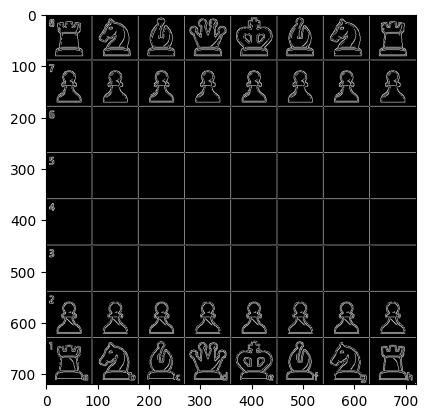

In [63]:
start_pos_img=load_image('../data/start.png')
# print(start_pos_img.shape)
lines=detect_lines(start_pos_img)
detect_moves('../data/videos/game0.mp4',start_pos_img, lines)